In [149]:
import pymysql
import pandas as pd
import numpy as np

In [150]:
conn = pymysql.connect(host="127.0.0.1", user="root", passwd="Eszqsc1234", db="mysql", use_unicode=True, charset="utf8")
cur = conn.cursor()
cur.execute("USE scraping")

news_data = pd.read_sql("SELECT * FROM protNews", conn, index_col="id")
pd.set_option('display.expand_frame_repr', False)

conn.close()
cur.close()

news_data

,title,genre,content
id,,,
1,'Москвичей предупредили о заполярной погоде','russia','В столичном регионе ожидается похолодание Об ...
2,'Нескольким российским регионам предсказали во...,'russia','Нескольким российским регионам предсказали во...
3,'Появилось видео с места крушения Ан','russia',''
4,'Перечислены регионы с наибольшим числом новых...,'russia','Наибольшее число новых случаев коронавируса з...
5,'Число умерших россиян с коронавирусом превыси...,'russia','Число умерших россиян с коронавирусом выросло...
...,...,...,...
6334,'Фигура итальянской биатлонистки в купальнике ...,'sport','Итальянская биатлонистка Доротея Вирер выложи...
6335,'В UFC назвали место проведения боя Нурмагомед...,'sport','Россиянин Хабиб Нурмагомедов проведет бой с а...
6336,'Роналду промахнулся с пенальти впервые за дней','sport','Форвард Ювентуса и сборной Португалии Криштиа...


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [151]:
# Новости с пустым контентом
cleared_news_data = news_data[news_data["content"] == "''"]
cleared_news_data

,title,genre,content
id,,,
3,'Появилось видео с места крушения Ан','russia',''
10,'Густой черный дым от пожара на российском скл...,'russia',''
33,'Россиянина с переломом обматерили в больнице ...,'russia',''
58,'На поле в Воронеже нашли загадочные круги','russia',''
67,'В Москве компания чеченцев избила кричавшего ...,'russia',''
...,...,...,...
6273,'Футболист Арсенала получил тяжелую травму в с...,'sport',''
6305,'Плющенко и Трусова восхитили фанатов синхронн...,'sport',''
6316,'Итальянский боец UFC задушил соперника','sport',''


In [6]:
# Новости без пустых content
data = news_data.drop(cleared_news_data.index)
data

,title,genre,content
id,,,
1,'Москвичей предупредили о заполярной погоде','russia','В столичном регионе ожидается похолодание Об ...
2,'Нескольким российским регионам предсказали во...,'russia','Нескольким российским регионам предсказали во...
4,'Перечислены регионы с наибольшим числом новых...,'russia','Наибольшее число новых случаев коронавируса з...
5,'Число умерших россиян с коронавирусом превыси...,'russia','Число умерших россиян с коронавирусом выросло...
6,'Россиянам рассказали о трех возможностях не з...,'russia','Иммунолог эксперт по общественному здоровью и...
...,...,...,...
6334,'Фигура итальянской биатлонистки в купальнике ...,'sport','Итальянская биатлонистка Доротея Вирер выложи...
6335,'В UFC назвали место проведения боя Нурмагомед...,'sport','Россиянин Хабиб Нурмагомедов проведет бой с а...
6336,'Роналду промахнулся с пенальти впервые за дней','sport','Форвард Ювентуса и сборной Португалии Криштиа...


In [155]:
maper = {"'russia'": 1, "'world'": 2, "'ussr'": 3, "'economics'": 4, "'forces'": 5,
         "'science'": 6, "'culture'": 7, "'sport'": 8, "'media'": 9, "'style'": 10}
gen = data.genre.map(lambda p: maper[p])
gen

id
1       1
2       1
4       1
5       1
6       1
       ..
6334    8
6335    8
6336    8
6337    8
6338    8
Name: genre, Length: 5976, dtype: int64

In [156]:
from sklearn.model_selection import train_test_split

y = gen
sentences = data["content"]

sentences_train, sentences_test, y_train, y_test = train_test_split(
    sentences, y, test_size=0.25, random_state=1000)

In [88]:
from keras.utils import to_categorical
y_train_binary = to_categorical(y_train)
y_test_binary = to_categorical(y_test)


In [90]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

'Нескольким российским регионам предсказали волну жары — температура поднимется выше нормы на   градусов Об этом сообщил научный руководитель Гидрометцентра Роман Вильфанд передает ТАСС По словам Вильфанда в Свердловской Челябинской Курганской и Тюменской областях температура держится на отметке в  градусов иногда поднимаясь до  градусов что превышает норму на  градусов Он пояснил что в указанных регионах очень ярко выражена волна тепла добавив что такая погода продлится до середины недели Ранее аллерголог Ирина Ярцева рассказала что употребление кофе в жаркую погоду может навредить организму так как этот напиток ускоряет выведение жидкости из организма — в жару это может привести к обезвоживанию Она также посоветовала ограничить употребление кофе в том случае если у человека есть физическая активность и нагрузки Ярцева добавила что людям с мочекаменными болезнями и поражением почек кофе не стоит пить больше одной чашки в день Максимальное количество кофе которое восполняется жидкостью

In [114]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 10000

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[ 456    5 6769 ...    0    0    0]


In [117]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model2 = Sequential(name="LastHope")
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.GlobalMaxPool1D())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(11, activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 10000, 50)         3848450   
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 50)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               13056     
_________________________________________________________________
dense_41 (Dense)             (None, 11)                2827      
Total params: 3,864,333
Trainable params: 3,864,333
Non-trainable params: 0
_________________________________________________________________


Train on 4482 samples, validate on 1494 samples
Epoch 1/5
4482/4482 [==============================] - 126s 28ms/step - loss: 1.9303 - accuracy: 0.3228 - val_loss: 1.5917 - val_accuracy: 0.4538
Epoch 2/5
4482/4482 [==============================] - 104s 23ms/step - loss: 1.1079 - accuracy: 0.6618 - val_loss: 1.0117 - val_accuracy: 0.6821
Epoch 3/5
4482/4482 [==============================] - 106s 24ms/step - loss: 0.6133 - accuracy: 0.8269 - val_loss: 0.8884 - val_accuracy: 0.7262
Epoch 4/5
4482/4482 [==============================] - 104s 23ms/step - loss: 0.3520 - accuracy: 0.9074 - val_loss: 0.8812 - val_accuracy: 0.7216
Epoch 5/5
4482/4482 [==============================] - 100s 22ms/step - loss: 0.1987 - accuracy: 0.9565 - val_loss: 0.8972 - val_accuracy: 0.7162
Training Accuracy: 0.9817
Testing Accuracy:  0.7162


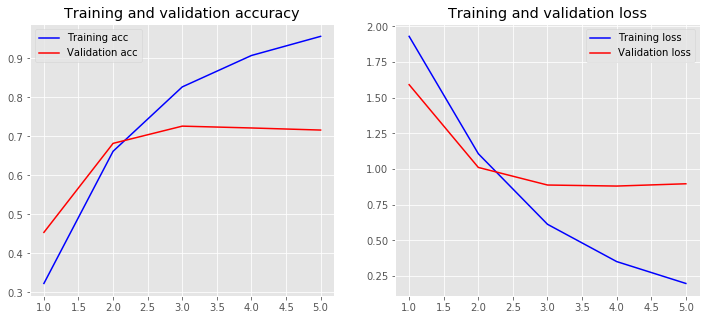

In [119]:
history = model2.fit(X_train, y_train_binary,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test_binary),
                    batch_size=10)
loss, accuracy = model2.evaluate(X_train, y_train_binary, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test_binary, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Training Accuracy: 0.9955
Testing Accuracy:  0.7055


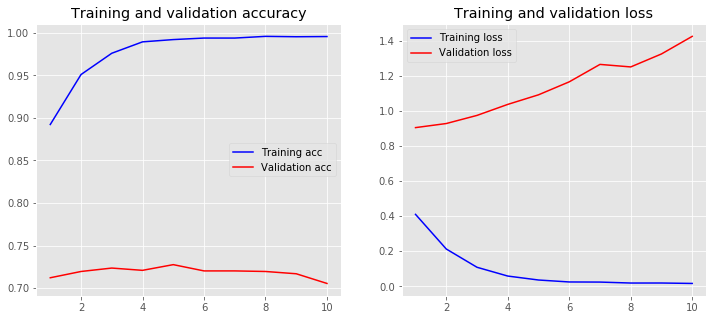

In [112]:
loss, accuracy = model.evaluate(X_train, y_train_binary, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test_binary, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [161]:
text1 = "'Помимо применения физической силы, судья по ходу игры был уличен в использовании мобильного телефона. Встреча прошла в Кисловодске в понедельник, 13 июля, и завершилась со счетом 1:1.'"
text = "В наступившем году должны состояться первые с июля 2011-го пилотируемые полеты США к МКС на собственных космических кораблях (до этого США отправляли своих астронавтов на околоземную орбиту при помощи многоразовых космических кораблей Space Shuttle). Скорее всего, первым из них в первом полугодии стартует Crew Dragon компании SpaceX, в декабре 2019-го успешно завершивший испытания парашютной системы, к которой ранее у НАСА были претензии, а до этого, в марте того же года, выполнивший первый (в беспилотном режиме) полет к МКС."
re = tokenizer.texts_to_sequences([text1])
resu = pad_sequences(re, padding='post', maxlen=maxlen)
otvet = model2.predict(resu)
# print(otvet, otvet.max())
print(np.where(otvet == np.amax(otvet))[1])
print(maper)

[8]
{"'russia'": 1, "'world'": 2, "'ussr'": 3, "'economics'": 4, "'forces'": 5, "'science'": 6, "'culture'": 7, "'sport'": 8, "'media'": 9, "'style'": 10}
